Prezentacja 2 - Żubry


In [69]:
using Statistics
using Random
using XLSX, DataFrames
using StatsPlots
using Plots

1. Wstęp i przypomnienie:
 - Zajmujemy się modelowaniem populacji żubrów w Polsce.
 - Wykorzystujemy do tego model Verhulsta, jednak chcemy go 'urzeczywistnić' poprzez dodanie losowości do parametrów rozrodczych
   (Natura nie jest idealnie matematyczna)
 - Patrzymy też na inne modele, jednak ostatecznie wykorzystamy nasz 'ulepszony' model Verhulsta.

2. 
RODZAJE MODELI:
 - nasz model logistyczny Verhulsta
 - model opierający się na wieku czy stopniu rozwoju zwierząt
 - model bazujący na interakcji drapieżnik - ofiara
 - model Malthusa

Klasyczny model Malthusa:
N(t) = N0 * e ^ (r*t)
N0 - liczba osobników
r - tempo wzrostu
t - czas

Tempo wzrostu populacji rozłożone na 3 czynniki:
 - śmiertelność
 - rozrodczość
 - choroby

Wersja 1

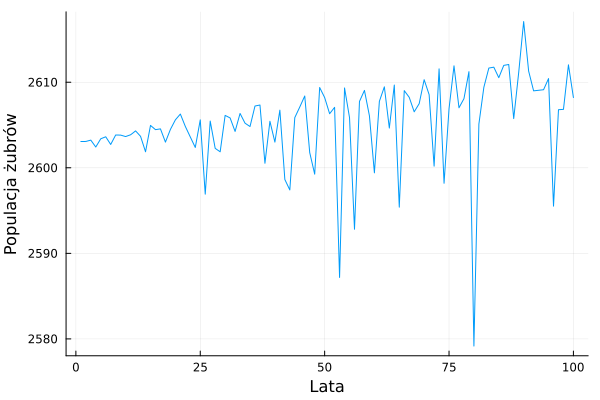

In [35]:
function Malthus(N0, r, t)
    return N0 * ℯ^(r*t)
end

#startowa populacja żubrów to nasze 2603 osobniki w roku 2023
N0 = 2603
#rozrodczość
r = [0, 0.00004, 0.000045, 0.00005, 0.000055, 0.00006]
#śmiertelność
s = [-0.00003, -0.000025, -0.00002, -0.000015, -0.00001, 0]
#choroby
ch = [0, 0, 0, 0, 0, 0, 0, 0, 0, -0.000001, -0.000003, -0.0001]
xs = [i for i in 1:100]
ys = []

for i in 1:100
    rnd_r = rand(1:length(r))
    rnd_s = rand(1:length(s))
    rnd_ch = rand(1:length(ch))
    N = Malthus(N0, r[rnd_r] + s[rnd_s] + ch[rnd_ch], i)
    push!(ys, N)
end

plot(xs, ys, xlabel = "Lata", ylabel = "Populacja żubrów", legend = false)

 - zbyt powolny model
 - po 100 latach ledwo kilka osobników więcej

Wersja 2

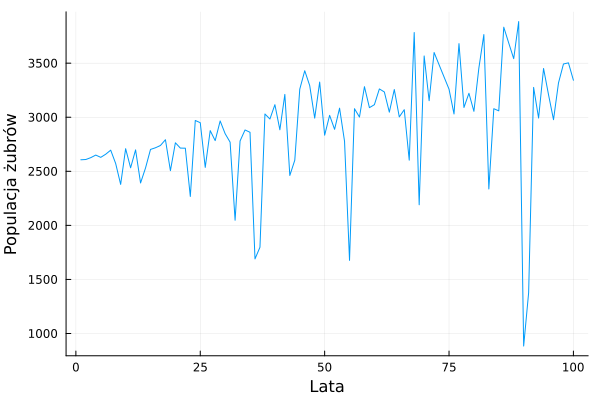

In [6]:
function Malthus(N0, r, t)
    return N0 * ℯ^(r*t)
end

#startowa populacja żubrów to nasze 2603 osobniki w tym roku 
N0 = 2603
#rozrodczość
r = [0, 0.004, 0.0045, 0.005, 0.0055, 0.006]
#śmiertelność
s = [-0.003, -0.0025, -0.002, -0.0015, -0.001, 0]
#choroby
ch = [0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0001, -0.0003, -0.01]
xs = [i for i in 1:100]
ys = []

for i in 1:100
    rnd_r = rand(1:length(r))
    rnd_s = rand(1:length(s))
    rnd_ch = rand(1:length(ch))
    N = Malthus(N0, r[rnd_r] + s[rnd_s] + ch[rnd_ch], i)
    push!(ys, N)
end

plot(xs, ys, xlabel = "Lata", ylabel = "Populacja żubrów", legend = false)

 - zbyt szybki model
 - skoki populacji o nawet 2000 - 2500 osobników

Wersja 3

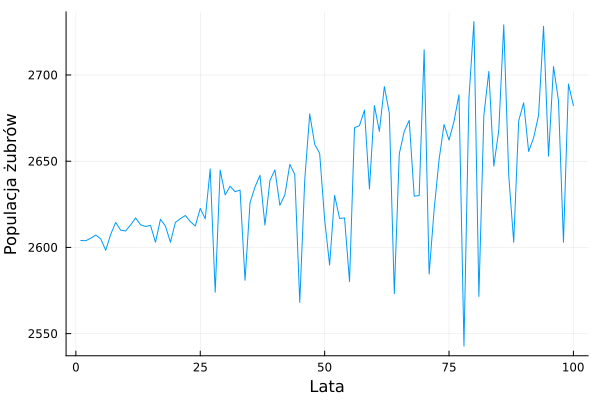

In [20]:
function Malthus(N0, r, t)
    return N0 * ℯ^(r*t)
end

#startowa populacja żubrów to nasze 2603 osobniki w tym roku 
N0 = 2603
#rozrodczość
r = [0, 0.0004, 0.00045, 0.0005, 0.00055, 0.0006]
#śmiertelność
s = [-0.0003, -0.00025, -0.0002, -0.00015, -0.0001, 0]
#choroby
ch = [0, 0, 0, 0, 0, 0, 0, 0, 0, -0.00001, -0.00003, -0.0001]
xs = [i for i in 1:100]
ys = []

for i in 1:100
    rnd_r = rand(1:length(r))
    rnd_s = rand(1:length(s))
    rnd_ch = rand(1:length(ch))
    N = Malthus(N0, r[rnd_r] + s[rnd_s] + ch[rnd_ch], i)
    push!(ys, N)
end

plot(xs, ys, xlabel = "Lata", ylabel = "Populacja żubrów", legend = false)

 - stosunkowo najlepszy model
 - jednak ciągle widać gwałtowne skoki populacji

Konkluzje Modelu Malthusa:
 - wykładniczy charakter modelu
 - głównie do stałego wzrostu/spadku populacji
 - idealne warunki, bez ograniczeń środowiska

Model posiada wiele takich samych wad jak model Verhulsta, bez jednej z największych zalet tego drugiego - ograniczonego środowiska.

3. Ulepszamy model Verhulsta.

Ustalamy próg populacji żubrów w Polsce na 10000. Jest to ok. 4x więcej niż jest obecnie, i brzmi to na sensowną liczbę, ba, nawet zawyżoną, ale zakładam wsparcie ludzi (dodatkowe pożywienie którego nie byłoby na dziko).

Zamiast stałego współczynnika rozrodczości, ustalamy współczynniki urodzeń i zgonów, generowane losowo z pewnego przedziału za każdym wywołaniem modelu. (W końcu, w naturze stosunek jednego i drugiego jest zmienny)

Dodajemy losowe czynniki chorobowe, które występują w naturze i są w stanie zdziesiątkować populację (co wynika po części z niskiej różnorodności genetycznej)

Dodajemy losowe czynniki "nie do przewidzenia" w rodzaju wybuchu wojny atomowej -  wizji, która podczas obecnych wydarzeń na wschodzie, wcale nie jest tak abstrakcyjna.

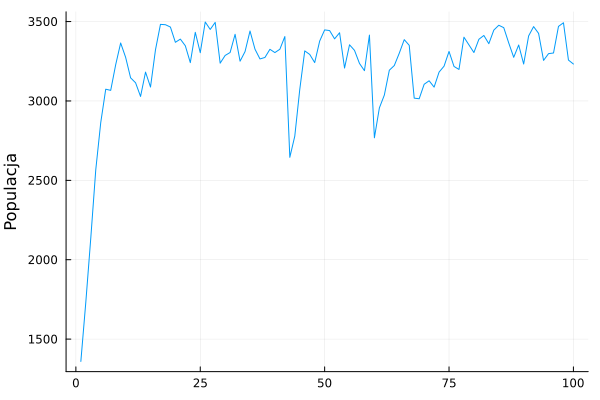

In [123]:
#Ulepszamy Verhulsta


function Verhulst(N, U, Z, K)
    u = rand(U)
    z = rand(Z)
    seed = rand(1:10000)
    if seed < 2
        #Opcja atomowa
        if N > 200
            N = 200 #W wyniku atomowej dewastacji cudem ostało się 200 żubrów, chyba że do tego czasu jest ich mniej
        end
        u = 3.5 #Natura przejmuje kontrolę nad światem, powoli wpychając się na zgliszcza cywilizacji
    elseif seed < 200
        #Zaraza wyniszcza populację żubrów. Tragedia.    
        N *= 17/20
        z+= 0.2
        N = round(N)
    elseif seed < 500
        #Niedobory pożywienia, żubry w tym roku głodują
        u -= 0.1
    elseif seed > 9995
        #W wyniku jakiegoś niewypowiedzianego w skutkach czynu, populacja żubrów wzrasta ekstremalnie. Populacja nigdy nie będzie już miała takich warunków.
        #(to wcale nie jest opcja atomowa tylko że żadna atomowka nie walnęla w Białowierzę i okolice)
        N += 500
        u += 0.3
    elseif seed > 9900
        #Ekstremalnie dobry rok dla żubrów. Prawdziwy raj na ziemii.
        u += 0.3
    elseif seed > 9500
        #Dobry rok dla żubrów. Populacja rośnie szybciej.
        u += 0.1
    end
    return (u-z)*N*(1-(N/K))
end
#N, u, z, K - parametry
#N - populacja w danym czasie t, u, z - współczynniki rozrodczości populacji, kolejno urodzenia i zgony,
# ru = -z < 4 (bo potem dzieją się dziwne rzeczy), K - pojemność środowiska

#Tworzymy wektory losowych współczynników
u0 = 3.0
z0 = 1.5
U = [u0+i for i in range(0,0.1,100)]
Z = [z0+i for i in range(0,0.1,100)]

N0 = 1025
K = 10000
xs = [i for i in 1:100]
ys = []
for i in 1:100
    N0 = Verhulst(N0, U, Z, K)
    push!(ys, N0)
end
plot(xs, ys, ylabel = "Populacja", legend = false)

Obserwacje:
 - Gwałtowne zmiany (nawet pomijając czynniki typu wojna atomowa).
 - Duża wrażliwość modelu na drobne zmiany współczynników.
 - Ustabilizowanie się modelu znacznie poniżej zakładanej liczby 10000 (Co wynika ze wzoru).
 
Wniosek:
 - Modele dobrze reprezentujące zmiany populacji dla niewielkich gatunków (rzędów kilku tysięcy) są trudne do zrobienia dobrze.

4. WYNIKI

Przeprowadziliśmy 1024 symulacje. Nie jest to dramatycznie dużo, jednak jest to wystarczająco.

In [44]:
#Wczytywanie wyników

cs = XLSX.readdata("wyniki.xlsx", "1", "A2:CV1025")
data = [parse(Float64,x) for x in cs]
t1 = DataFrame(data, :auto)


1024×100 DataFrame
  Row │ x1       x2       x3       x4       x5       x6       x7       x8      ⋯
      │ Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float64 ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 1425.44  1804.98  2233.72  2607.41  2817.34  3025.18  3179.93  3215.86 ⋯
    2 │ 1354.82  1792.39  2154.68  2696.12  2931.94  3139.87  3376.76  3216.96
    3 │ 1376.19  1697.48  2076.99  2553.18  2955.67  3093.66  3304.16  3280.63
    4 │ 1365.04  1762.11  2187.67  2634.4   2987.03  3163.35  3224.35  3206.44
    5 │ 1360.39  1806.91  2262.5   2482.68  2790.04  2925.98  3075.49  3248.22 ⋯
    6 │ 1382.69  1807.72  2282.74  2662.05  2949.83  3029.19  3203.65  3279.16
    7 │ 1408.71  1799.51  2223.96  2677.89  3052.08  3215.11  3410.94  3373.51
    8 │ 1338.09  1685.88  2232.75  1986.66  2371.89  2715.78  3247.1   3218.23
  ⋮   │    ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮    ⋱
 1018 │ 1431.94  1844.06  2205.88  2568.51  2924.88  3110.35  3199.23  3300.95 ⋯
 1019 │ 1369.68  1770.73  1663.34  1572.15  2023.61  2413.01  2772.01  2962.91
 1020 │ 1368.76  1761.37  2148.84  2447.13  2867.64  3136.14  3946.44  3612.46
 1021 │ 1332.52  1761.6   2171.05  2534.1   2950.66  3170.45  3409.76  3005.23
 1022 │ 1338.09  1797.1   2232.06  2541.23  2816.36  3040.89  3311.09  3422.81 ⋯
 1023 │ 1452.39  1913.58  2311.72  2606.73  3071.88  3209.55  3392.43  3375.94
 1024 │ 1331.59  1827.02  2363.51  2736.51  2967.44  3060.74  3132.26  3207.17
                                                92 columns and 1009 rows omitted

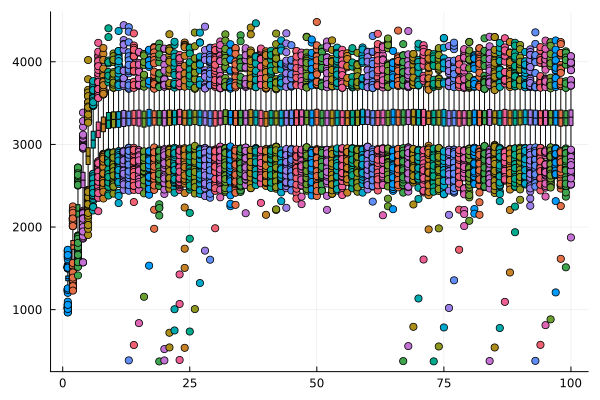

In [47]:
@df t1 boxplot(cols(), legend = false)

Nie jest to zbyt czytelne, ograniczę x do 25

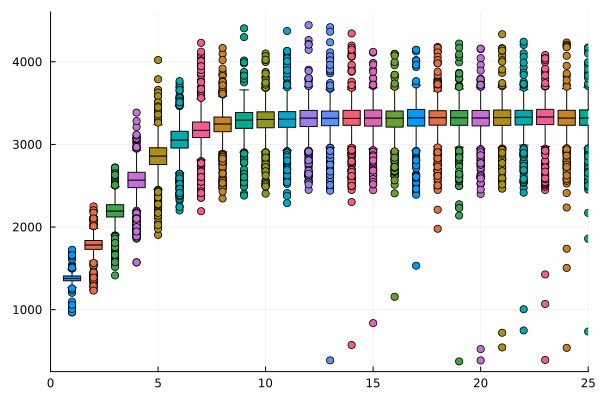

In [50]:
@df t1 boxplot(cols(), legend = false, xlim = (0,25))

Widzimy, że wariacje są duże, czego można było się domyślić, jednak generalnie populacja stabilizuje się w okolicach 3200 osobników.
Losowe punkty na dole to opcja atomowa.

Najlepiej stabilność populacji zobaczymy na wykresie średnich:

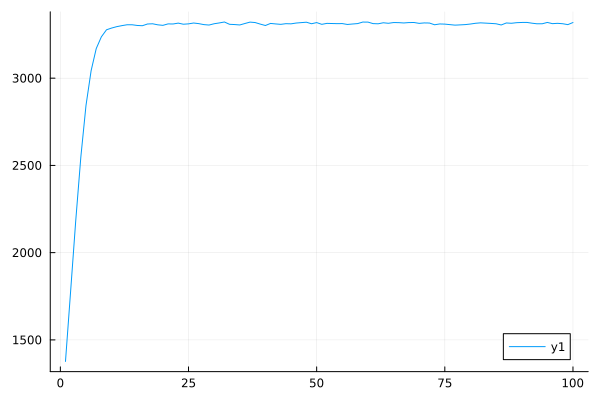

In [86]:
kolumny = [view(data, :, i) for i in 1:size(data, 2)]
srednie = [mean(x, dims=1) for x in kolumny]
srednie2 = [srednie[x][1] for x in 1:100]
xy = [x for x in 1:100]
plot(xy, srednie2)


Porównajmy to z wykresem 'Czystego' Verhulsta z prezentacji 1

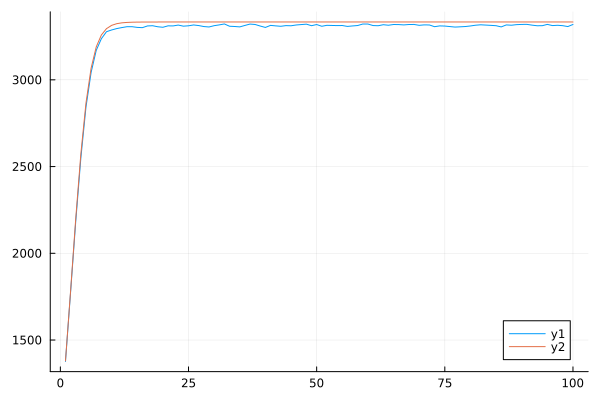

In [85]:
function Verhulst(N, r, K)
    return r*N*(1-(N/K))
end
N0 = 1025
r = 1.5
K = 10000
ys = []
for i in 1:100
    N0 = Verhulst(N0, r, K)
    push!(ys, N0)
end

plot(xy, [srednie2, ys], legend = false)

Wynik średni jest praktycznie identyczny do wyniku z 'czystego' modelu Verhulsta. Oczywiście, średnia nie jest najlepszym wyznacznikiem,
a tak właściwie to takiego wyniku należało się spodziewać, jednak przynajmniej wynik średni ma trochę 'tekstury', nie jest taki płaski jak wynik czystego modelu.

WNIOSKI